This post is a somewhat short recap of machine learning in general. I wrote it as lecture notes for a tutorial that I gave in one of the [robotics courses at TU Berlin](http://www.robotics.tu-berlin.de).

It will probably be difficult to understand it in detail if you are a beginner. For beginners, I recommend reading [my blog on intuitive machine intelligence](http://www.intuitivemi.de).

## General setting

In general, we distinguish three general paradigms in ML

- **Supervised Learning**
- **Unsupervised Learning**
- **Reinforcement Learning**

Additionally, there is a variety of other paradigms, which are not going to be covered here, such as **semi-supervised learning** and **learning from side information** which will not be covered here.

In all types of machine learning the goal is to learn a function to predict some output from some input data:

$$f: X \rightarrow Y$$

The different paradigms differ in 
- the goal, i.e. what kind of guys $X$ and $Y$ are
- the training data available to learn $f$

We will now review the different paradigms and give examples.

# Supervised Learning

Supervised learning is by far the most popular paradigm. Here, we are directly given examples from $X$ and $Y$, i.e. $N$ pairs $\{ x^{(i)}, y^{(i)} \}_{i=1\ldots N }$. The data $x^{(i)}$ are called the *input data* and $y^{(i)}$ the *labels*.
Together, they are called the *training data*.

Any ML method usually consists of three ingredients.
- A representation of $f$, i.e. whether it is a linear function, polynomial, neural network, or non-parametric, etc. 
- An appropriate *loss function* $\mathcal{L}$,
- which is minimized using an *optimization method*. 

The loss function for supervised learning looks as follows:

$$f = \textrm{argmin}_{f} \mathcal{L} ( \{ x^{(i)}, y^{(i)} \}_{i=1\ldots N })$$

A *loss function* can be thought of as an assessment of how good $f$ fits the training data. If its value is high, it means that $f(x^{(i)})$, i.e. the prediction of our current function $f$ given $x^{(i)}$, is very different from the known value $y^{(i)}$. If $\mathcal{L} = 0$, it means the $f$ perfectly fits the data. 

An *optimization* method can be thought of as some method that is given data and a loss function and automatically tries to find the minimal function fulfilling the loss. There is a wide variety of optimization methods, and they mostly differ by the knowlegde they have about $f$, and about the properties of $f$ (e.g. if $f$ is differentiable, we can compute its derivative, set it to zero, and go step by step in the direction of steepest descent; this is called *gradient descent optimization*). We will mostly treat optimization as a black-box here, but it is of course the success in learning a function greatly depends on the optimization used.

The representation of $f$ also drastically influences. The easiest and best-understood representation are linear functions, but also neural networks (which are some sort of nonlinear functions) are very common nowadays.  

Usually you don't have to worry about choosing $f$, the loss and the optimization if you just want to apply some ML method. An ML method usually determines all three things, and is tuned in such a way that all of them work together nicely.


### Overfitting

However, only making $\mathcal{L}=0$ for the training data, i.e. only fitting the training data does not necessarily solve the problem -- the task is to learn an $f$ that *generalizes* to unseen examples $x^{(j)}$. Fitting the training data is very easy: just memorize all of them by heart! This will trivially bring $\mathcal{L}$ for our training data. 
But the core problem of any machine learning is to learn an $f$ that generalizes. If $f$ only works well on the training data, but not on unseen data, $f$ is said to *overfit*.

To ensure that our function does not overfit, we divide the data into three sets:

- *Training data*<br/>The data used for actually fitting the function
- *Validation data*<br/>Additional data, not used learning the function, but only used to compute the loss for our current estimate of the function. It is also used to tune the hyperparameters of your method, or decide which method to use.
- *Test data* <br/> Another additional data set, neither used for training nor for validation. You can think of it as being locked in some secret drawer, and it is only released and used to evaluate $f$ once you are sure that you have propetly learned $f$ .


### Example: Linear regression

Let us consider a simple example for supervised learning: *linear regression*.

Assume we want to predict the price of apartments in Berlin, given their size of square meters of the apartment. Here is the data (for example collected from wg-gesucht.de):

<table style="border 1px solid black;">
<tr>
<th> $X$ (square meters) </th>
<th> $Y$ (monthly rent in Euro)</th>
</tr>
<tr>
<td>40</td><td>500</td>
</tr>
<tr>
<td>65</td><td>620</td>
</tr>
<tr>
<td>80</td><td>855</td>
</tr>
<tr>
<td>81</td><td>910</td>
</tr>
<tr>
<td>100</td><td>1100</td>
</tr>
<tr>
<td>120</td><td>1250</td>
</tr>
</table>

Let's plot the data

Populating the interactive namespace from numpy and matplotlib


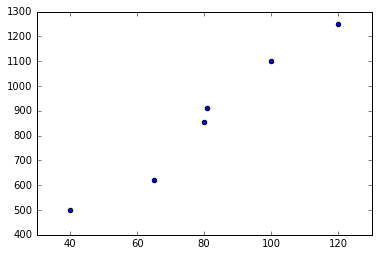

In [1]:
%pylab inline

X = array([40, 65, 80, 81, 100, 120]).reshape((-1, 1))
Y = array([500, 620, 855, 910, 1100, 1250])

scatter(X, Y);

The idea is linear regression is to fit a linear function, i.e. a line of the form $f(x) = w_1 x + w_0$ to the data. To learn such a line we define as loss the *mean-squared error* which penalizes large deviations of $f(x)$ from the known $y$:

$$ \mathcal{L}_\textrm{MSE}
= \frac{1}{2N}  \sum_{i=0}^N ( f(x^{(i)}) - y^{(i)})^2\\
= \frac{1}{2N} \sum_{i=0}^N ( w_1 x^{(i)} + w_0 - y^{(i)})^2
$$

Maybe you are a bit confused about the fraction $\frac{1}{2N}$. The reason we use it, because if we compute the derivative $\mathcal{L}_\textrm{MSE}$, the square within the sum cancels out this fraction; and the $\frac{1}{N}$ normalizes for the number of training examples.

Note that usually $x$ is multi-dimensional, i.e. a vector $\mathbf{x}$. Then $w_1$ becomes a weight vector $\mathbf{w}$. 
We can do another trick to get rid of $w_0$ (called the *bias* or *intercept* term) by appending a $1$ to $\mathbf{x}$, and extending $\mathbf{w}$ by one dimension. This facilitates notation a bit, as it allows us to write the loss using vector notation:

$$ \mathcal{L}_\textrm{MSE} = \frac{1}{2N} \sum_{i=0}^N ( \mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2$$

### Gradient descent

How to optimize it? One way is to compute the partial derivative wrt. each $j$-th element of the weight (the so-called *gradient*), and change the updates:

$$
\nabla \mathcal{L}_\textrm{MSE} = 
\frac{\partial \mathcal{L}_\textrm{MSE}}{\partial {w}_j} 
= \frac{1}{2N} \sum_{i=0}^N \frac{\partial}{\partial {w}_j} 
( \mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2 \\
= \frac{1}{2N} \sum_{i=0}^N 2 w_j^{(i)}  (w_j x_j^{(i)} - y^{(j)})\\
= \frac{1}{N} \sum_{i=0}^N w_j (f(x_j^{(i)}) - y^{(j)})
$$

The [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm then goes as follows:

- Initialize the weights $\mathbf{w}$ randomly
- Update each $j$-th entry in the weight vector by following the negative gradient:<br/>$w_j^\textrm{new} = w_j - \alpha \frac{1}{N} \sum_{i=0}^N w_j (f(x_j^{(i)}) - y^{(j)})$
 
Here, $\alpha$ denotes the step size. This has to small enough, so we don't overshoot. 

If we image the loss function to be a "bowl" and every $\mathbf{w}$ to be a point in this bowl, the gradient points towards the bottom of this bown, and thus the minimum of the loss. The update rule then takes small steps towards this minimum. 
This is a cool visualization which is also accompanied by a [Matlab script](http://www.mathworks.com/matlabcentral/fileexchange/35389-gradient-descent-visualization):
<img src="http://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/35389/versions/1/screenshot.png" style="width:30%" alt="Obtained from http://www.mathworks.com/matlabcentral/fileexchange/35389-gradient-descent-visualization" />
  
Gradient descent is a very important technique, very popular especially for training neural networks (see below).

### Ordinary least squares

In the linear regression case, however, there is a more direct solution. If we consider $\mathbf{w}$ to be a matrix rather then a vector, we can write the loss in the following way:

$$ \mathcal{L}_\textrm{MSE} = \frac{1}{2} (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y})$$

where $\mathbf{X}$ contains in each $i$-th *row* on training example $\mathbf{x}^{(i)}$, and $\mathbf{y}$ in each $i$-th row a
label  $y^{(i)}$.

Now we can compute the derivative of $\mathcal{L}_\textrm{MSE}$, set it 0, and solve for $\mathbf{w}$. As you can check yourself, the derivative is given by:
$$ \frac{d \mathcal{L}_\textrm{MSE}}{d \mathbf{w}} = \mathbf{X}\mathbf{w} - \mathbf{y} \\
\mathbf{X}\mathbf{w} - \mathbf{y}  = 0\\
\mathbf{X}\mathbf{w}  = \mathbf{y}
$$

To now solve it for $\mathbf{w}$, we need to invert $\mathbf{X}$ -- which is usually not possible because it is not square in the general case. But we can apply a trick, namely use the *pseudo-inverse*: 

$$\mathbf{X}\mathbf{w} = \mathbf{y}\\
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}\\
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^-1 \mathbf{X}^T\mathbf{y}\\
$$

where the *pseudo-inverse* is given by $(\mathbf{X}^T\mathbf{X})^-1 \mathbf{X}^T$.

### Computational example

Let's now implement this in python. 



In [2]:
# transpose training data and append 1
Xhat = np.hstack([X, np.ones((X.shape[0],1.))])
w = np.linalg.inv(Xhat.T.dot(Xhat)).dot(Xhat.T).dot(Y)
w

array([ 10.04581152,  58.78926702])

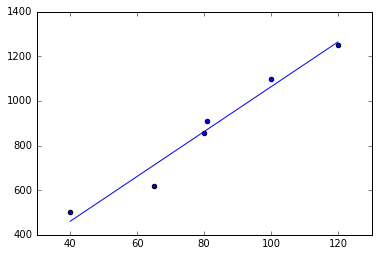

In [3]:
scatter(X, Y)
plot(X, Xhat.dot(w));

Luckily, there are libraries that do all that for us. One of the most popular ML libraries in python is *scikit learn*. 
We can easily verify that it computes the same function:

(we see that sklearn automatically adds a bias, stored in the variable "intercept_")

(array([ 10.04581152]), 58.789267015706741)

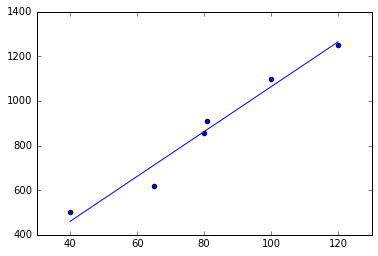

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)

X_rng = np.linspace(40, 120, 100).reshape((-1,1))

scatter(X, Y)
plot(X_rng, lr.predict(X_rng));
lr.coef_, lr.intercept_

The blue line is now our prediction. And you see that it fits the data Ok, but not perfectly. Still, it looks like a reasonable guess. Most importantly, it also makes a prediction for inputs $x$ for which we did not have any training data.

## Overfitting

What if we don't want to fit a line, but some more complex model, e.g. a polynomial? This is easily down by *augmenting our input* (also called *feature expansion*) by different powers of the input:

$f(\tilde{\mathbf{x}}) = [\mathbf{x}, \mathbf{x}^2, \mathbf{x}^3, ... ]$

Let's try that out:

(array([  1.44137296e+04,  -3.94630145e+02,   5.20499616e+00,
         -3.31906931e-02,   8.21304324e-05]), -201202.688457913)

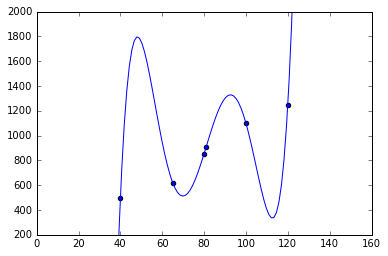

In [5]:
def polynomial_feature_expansion(X):
    return np.hstack([X, X**2, X**3, X**4, X**5,])

X_rng = np.linspace(20, 140, 100).reshape((-1,1))

lr = LinearRegression()
lr.fit(polynomial_feature_expansion(X), Y)

scatter(X, Y)
plot(X_rng, lr.predict(polynomial_feature_expansion(X_rng)));
ylim(200, 2000)
lr.coef_, lr.intercept_

We see that the training data is fitted almost perfectly; but the function hallucinates weird values inbetween and before/after the training data! This is a classical example of overfitting: we used a function that is too "powerful", as it has many more parameters than the linear model. There are different ways to remedy this problem:
- [More training data](https://en.wikipedia.org/wiki/Big_data)!
- Restricting the function to a simpler one (e.g. less parameters)<br/>(The danger can be *underfitting*, i.e. choosing a too simple model)
- Model selection, e.g. using [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29)
- Incorporating prior knowledge about the problem, e.g. by [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Regularization

[Regularization](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29) is a different way to enforce a simpler function to be learned, while keeping the number of parameters that are learned the same. Instead, we put additional into the loss function. A popular regularization is *L2* which puts a [L2-norm](http://mathworld.wolfram.com/L2-Norm.html) penalty on the weights, i.e. $||\mathbf{w}||^2$. The optimizer then has to make sure not only to fulfill the initial loss, e.g. the mean-squared error, but also the regularization. 

A linear regression with L2 regularization is called *ridge regression*. The loss then becomes:
$$ \mathcal{L}_\textrm{Ridge} = \frac{1}{2} (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y}) + \alpha ||\mathbf{w}||^2 $$

where $\alpha$ weights the influence of the regularizer. 

Ridge regression is also implemented in scikit learn:

(array([ -5.20832737e-02,  -2.00807910e+00,   5.28324483e-02,
         -4.75230122e-04,   1.44755456e-06]), 1401.9265643035942)

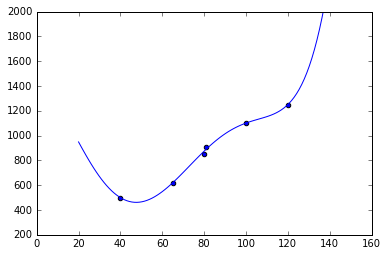

In [6]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=20.)
lr.fit(polynomial_feature_expansion(X), Y)

scatter(X, Y)
plot(X_rng, lr.predict(polynomial_feature_expansion(X_rng)));
ylim(200, 2000)
lr.coef_, lr.intercept_

We see, that the values inbetween are much smoother, but still for values $>120$ and $<40$ the linear model reflects our intuition about the real $f$ better.

## Regression vs. Classification

Before we talk about more sophisticated supervised learning method, we should clarify the terms *regression* and *classification*. The only difference between these two concepts is whether $y$ is discrete or continuous. In the previous example we used regression, i.e. we treated the price as a continuous variable. In classification, we are usually given a discrete, finite set of *classes*, and we are only interested in predicting the class of a new input. The only thing that changes because of this is the loss. We won't bother about these loss functions now, but in case you are interested, common choices are the [categorical cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression) loss or the [hinge loss](https://en.wikipedia.org/wiki/Hinge_loss).

But watch out, the terminology is not always fully consistent: a linear model with a categorical cross-entropy loss is called *logistic regression* -- although it is actually a *classification*!

## (Deep) Neural Networks

Currently, they are probably the most popular approach in supervised learning. The idea is to compose the function $f$ of small slightly nonlinear functions (neurons) and connect them. This small nonlinear functions are called *neurons*, and together they form a neural network that can be visualized as follows:

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e4/Artificial_neural_network.svg" alt="Artificial neural network (https://commons.wikimedia.org/wiki/File:Artificial_neural_network.svg)" style="width: 20%;"/>

The picture (image taken from [wikipedia](https://commons.wikimedia.org/wiki/File:Artificial_neural_network.svg)) depicts a network with an input layer ($=\mathbf{x}$), an output ($=f(\mathbf{x})$, should be equal to $y$) and a hidden layer. This hidden layer can learn some representation of $\mathbf{x}$ that is suitable for predicting $y$. For the record, this network structure is also sometimes called *multi-layer perceptron*.

What does a (non-input and non-output) neuron look like? In fact, a neuron basically multiplies a linear weight vector with its input (sounds exactly like linear regression, right?) and then applying some nonlinearity on the output of this operation. Let's make this formal; a neuron $h_i$ (in the hidden layer), given input $\mathbf{z}$ (in the network above $\mathbf{z} = \mathbf{x}$), computes its output as follows:

$$h_i(\mathbf{z}) = \sigma(\mathbf{w}_{h_i}^T\mathbf{z})$$

where $\sigma$ denotes some nonlinear *activation function*, often something like the *sigmoid*-function:

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$,

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" alt="Signmoid function (https://commons.wikimedia.org/wiki/File:Sigmoid-function-2.svg)" style="width: 40%;"/>

although the [hyperbolic tangent](http://mathworld.wolfram.com/HyperbolicTangent.html) and [rectifiers](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) are used more commonly.

A hidden layer $f_h$ composed of $H$ neurons then computes its output as follows:

$$ f_h(\mathbf{z}) = \sigma(\mathbf{W}_{h} \mathbf{z}),$$

where ${\mathbf{W} _ h}$ is a $\mathrm{dim}(\mathbf{z}) \times k$ matrix  composed of the stacked (transposed) weight vectors $\mathbf{w}_{h_i}^T, i=1 \ldots H$, and the activation function $\sigma$ is applied separately to each output dimension of $\mathbf{W}_H$. 

So what are *deep networks*? The idea is to add multiple hidden layers -- the more hidden layers there are, the "deeper" the network is? Mathematically, it is just a repeated application of multiplying a linear weight with the output of the previous layer, then computing the activation, passing it to the next layer, and so on.

Finally, we have to say how to train them. We can use the same loss functions as for linear regression (or classification, of course), however, we have adapt our optimization scheme -- yet the most popular method is gradient descent. However, if we have multiple layers, we need to apply some tricks. The first trick is *backpropagation*; it basically says that to train multiple layers, we are going to train layer by layer separately, and pass the loss backwards through the network. For this to work, we must apply some additional tricks, e.g. setting the initial values of all weights appropriately and so on. 

In case you want to a more in-depth treatment of deep learning, check out [this book](http://www.deeplearningbook.org/).

# Unsupervised Learning

Unsupervised differs from supervised learning that we are only given $\{x^(i)\}_{i=1 \ldots N}$, an no labels. This obviously means that the loss functions we've seen so far will not work. Instead the loss functions impose some "statistical" constraints on $y$. A good example is *Principal component analysis* (PCA): here we want to learn a low-dimensional variant of $x$ -- however, which still contains roughly the same "information" as the original $x$. The question is how to quantify "information". This very complicated and highly depends on the task; but PCA defines information as *high variance* (in a statistical sense). Therefore, the loss for PCA is roughly equivalent to:

$${\mathcal{L}}_\textrm{PCA} \approx -\textrm{Var}(f(\mathbf{x}))$$

I we need some additional constraints to make this problem solvable. I will not go into details here, but you should understand, that one can formulate learning objectives without any supervised signal, but just by formulating some desired properties of the result of $f$ in the loss function.

Note that PCA is somewhat the "regression" variant of unsupervised learning. There are also methods that map data into discrete representations, e.g. in clustering. The most popular and yet simplest method is probably [k-means](https://en.wikipedia.org/wiki/K-means_clustering).

Also note that unsupervised learning has somewhat different applications than supervised learning. Often it is used for pre-processing the input data, in order to then feed its output to a supervised learning method. Another important application is exploratory data analysis, i.e. studying and finding patterns in your data.

# Reinforcement Learning

In reinforcement learning our $Y$ are *actions* that an agent should take, and our input *X* is the state. Usually we call the state $\mathbf{s}$, the actions $\mathbf{a}$, and the function we want to learn is a *policy* $\pi$:

$$ \pi(\mathbf{s}) = \mathbf{a}$$

A crucial difference to supervised learning is that we do not know the correct actions $\mathbf{a}$. Rather, we only get a *reward signal* $r(\mathbf{s}, \mathbf{a})$ for every action we take (in a certain state).

Obviously, this problem is much harder as learning becomes indirect -- you need to figure out. There is a wide variety of different techniques, such as *policy search*, *value-based methods* and *model-based reinforcement learning* to tackle this problem. We cannot look at all of these techniques in detail here, but it is important that you at least understand the general setting of reinforcement learning, and its difference to supervised learning (and unsupervised learning).